In [1]:
import pandas as pd
import numpy as np
from  sklearn  import tree
from sklearn import preprocessing
from sklearn import tree

In [2]:
df = pd.read_csv('...........\\drugsCom_raw\\Process.csv')

In [3]:
df.head()

,Unnamed: 0,Id,rating,ratingSentiment,ratingSentimentLabel,vaderReviewScore,vaderSentiment,vaderTarget
0,0,206461,9,2,positive,0.0000,0,neutral
1,1,95260,8,2,positive,0.9070,2,positive
2,2,92703,5,0,neutral,0.7096,2,positive
3,3,138000,8,2,positive,0.7184,2,positive
4,4,35696,9,2,positive,0.9403,2,positive


In [4]:
data=df.iloc[:,:-1]
data

,Unnamed: 0,Id,rating,ratingSentiment,ratingSentimentLabel,vaderReviewScore,vaderSentiment
0,0,206461,9,2,positive,0.0000,0
1,1,95260,8,2,positive,0.9070,2
2,2,92703,5,0,neutral,0.7096,2
3,3,138000,8,2,positive,0.7184,2
4,4,35696,9,2,positive,0.9403,2
...,...,...,...,...,...,...,...
215058,53761,159999,10,2,positive,-0.8924,1
215059,53762,140714,9,2,positive,0.9223,2
215060,53763,130945,8,2,positive,-0.8471,1
215061,53764,47656,1,1,negative,-0.8175,1


In [5]:
data_df=data.drop(['Unnamed: 0'],axis=1)

In [6]:
data_df.head()

,Id,rating,ratingSentiment,ratingSentimentLabel,vaderReviewScore,vaderSentiment
0,206461,9,2,positive,0.0000,0
1,95260,8,2,positive,0.9070,2
2,92703,5,0,neutral,0.7096,2
3,138000,8,2,positive,0.7184,2
4,35696,9,2,positive,0.9403,2


In [7]:
x0 = data_df.iloc[ : , 0 :-1]
x0

,Id,rating,ratingSentiment,ratingSentimentLabel,vaderReviewScore
0,206461,9,2,positive,0.0000
1,95260,8,2,positive,0.9070
2,92703,5,0,neutral,0.7096
3,138000,8,2,positive,0.7184
4,35696,9,2,positive,0.9403
...,...,...,...,...,...
215058,159999,10,2,positive,-0.8924
215059,140714,9,2,positive,0.9223
215060,130945,8,2,positive,-0.8471
215061,47656,1,1,negative,-0.8175


In [8]:
y0 = df['vaderTarget']
y0

0          neutral
1         positive
2         positive
3         positive
4         positive
            ...   
215058    negative
215059    positive
215060    negative
215061    negative
215062     neutral
Name: vaderTarget, Length: 215063, dtype: object

In [9]:
l1 = preprocessing.LabelEncoder()
l1.fit(['neutral', 'positive','negative'])

LabelEncoder()

In [10]:
x = x0
x.iloc[:,3] = l1.transform(x0.iloc[:,3])
x0

,Id,rating,ratingSentiment,ratingSentimentLabel,vaderReviewScore
0,206461,9,2,2,0.0000
1,95260,8,2,2,0.9070
2,92703,5,0,1,0.7096
3,138000,8,2,2,0.7184
4,35696,9,2,2,0.9403
...,...,...,...,...,...
215058,159999,10,2,2,-0.8924
215059,140714,9,2,2,0.9223
215060,130945,8,2,2,-0.8471
215061,47656,1,1,0,-0.8175


In [11]:
l0 = preprocessing.LabelEncoder()
l0.fit(['neutral', 'positive','negative'])
y= l0.transform(y0)

In [12]:
y

array([1, 2, 2, ..., 0, 0, 1])

In [13]:
x0

,Id,rating,ratingSentiment,ratingSentimentLabel,vaderReviewScore
0,206461,9,2,2,0.0000
1,95260,8,2,2,0.9070
2,92703,5,0,1,0.7096
3,138000,8,2,2,0.7184
4,35696,9,2,2,0.9403
...,...,...,...,...,...
215058,159999,10,2,2,-0.8924
215059,140714,9,2,2,0.9223
215060,130945,8,2,2,-0.8471
215061,47656,1,1,0,-0.8175


In [14]:
clf = tree.DecisionTreeClassifier()

[Text(200.88000000000002, 181.2, 'X[4] <= 0.05\ngini = 0.539\nsamples = 215063\nvalue = [99830, 9035, 106198]'),
 Text(133.92000000000002, 108.72, 'X[4] <= -0.05\ngini = 0.152\nsamples = 108865\nvalue = [99830, 9035, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 99830\nvalue = [99830, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 9035\nvalue = [0, 9035, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 106198\nvalue = [0, 0, 106198]')]

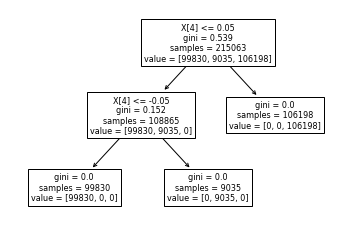

In [15]:
clf_fit =clf.fit(x,y)
tree.plot_tree(clf_fit)

[Text(200.88000000000002, 181.2, 'X[4] <= 0.05\nentropy = 1.209\nsamples = 215063\nvalue = [99830, 9035, 106198]'),
 Text(133.92000000000002, 108.72, 'X[4] <= -0.05\nentropy = 0.413\nsamples = 108865\nvalue = [99830, 9035, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 99830\nvalue = [99830, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 9035\nvalue = [0, 9035, 0]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 106198\nvalue = [0, 0, 106198]')]

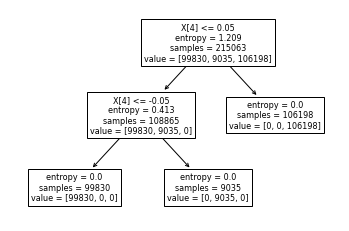

In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf_fit =clf.fit(x,y)
tree.plot_tree(clf_fit)

In [17]:
data_bayes=x0

# ================================Bayse

In [18]:
import nltk
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy
data_bayes = numpy.random.rand(100, 5)
numpy.random.shuffle(data_bayes)
training, test = data_bayes[:80,:], data_bayes[80:,:]
print(training,test)

classifier = nltk.NaiveBayesClassifier.train(training)

print("Naive Bayes Algo Accuracy:", (nltk.classify.accuracy(classifier,test))*100)


[[0.1987314  0.42732063 0.017934   0.48355671 0.88976405]
 [0.95625451 0.83869059 0.58444718 0.483578   0.60848297]
 [0.93290672 0.41525814 0.04435639 0.31632065 0.28320288]
 [0.0079684  0.13635072 0.4119271  0.68644579 0.29982104]
 [0.71688913 0.85154104 0.33101245 0.43789394 0.71421863]
 [0.80600855 0.94204977 0.47519367 0.70235195 0.71647505]
 [0.59324282 0.24600582 0.48833661 0.77905403 0.45290581]
 [0.86901787 0.88650532 0.29820666 0.15383178 0.10102257]
 [0.71105297 0.90547558 0.25856708 0.97045145 0.36643718]
 [0.44674251 0.28574926 0.44007382 0.63242112 0.8943617 ]
 [0.10764886 0.43782926 0.06106357 0.79996478 0.25417637]
 [0.26973525 0.35633953 0.15239139 0.42699778 0.18289258]
 [0.38539125 0.76629529 0.92904816 0.39433936 0.43297949]
 [0.15077982 0.75152652 0.42934695 0.43757632 0.65372024]
 [0.19386324 0.93873607 0.36949066 0.34578056 0.00973919]
 [0.43506068 0.28552208 0.43112344 0.75920094 0.97395591]
 [0.20544947 0.02975253 0.49278616 0.61192342 0.79600785]
 [0.68103656 0

ValueError: too many values to unpack (expected 2)

In [ ]:
#============================

# ================================KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
dataset=x0
print(len(dataset))
dataset.head(22)

In [ ]:
zero_not_accepted =['Id','rating','ratingSentiment','ratingSentimentLabel','vaderReviewScore']

In [ ]:
for column in zero_not_accepted:
    dataset[column]=dataset[column].replace(0,np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NAN,mean)

In [ ]:
print(dataset['Id'])

In [ ]:
x=dataset.iloc[:,0:5]
y=dataset.iloc[:, 4]
x_train , x_test , y_train , y_test =train_test_split(x,y,random_state=0 ,test_size=0.2)

In [ ]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)


In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
import math

In [ ]:
math.sqrt(len(y_train))

In [ ]:
math.sqrt(len(y_test))

In [ ]:
#classifier = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')
#classifier.fit(x_train,y_train)
#cm = confusion_matrix(y_test , y_pred)
#print(cm)

# ================================MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split


X, y = make_classification(n_samples=100, random_state=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)


clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])


clf.score(X_test, y_test)

# ========================================================

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
print(x0.shape)
x0.describe().transpose()

In [ ]:
x0

In [ ]:
target_column = ['vaderReviewScore'] 
predictors = list(set(list(x0.columns))-set(target_column))
x0[predictors] = x0[predictors]/x0[predictors].max()
x0.describe().transpose()

In [ ]:
X = x0[predictors].values
y = x0[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

# =======================Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train = pd.read_csv('...............\\Proj_paython_drug\\processed.csv.gz')

train.head()

In [ ]:
train.isnull()


<AxesSubplot:>

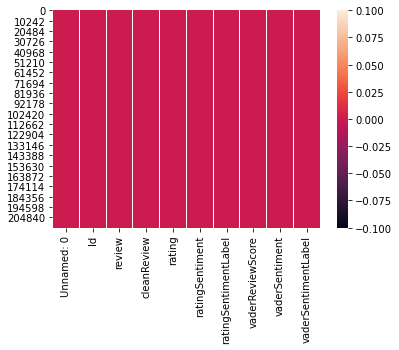

In [5]:
sns.heatmap(train.isnull())


<AxesSubplot:xlabel='rating', ylabel='count'>

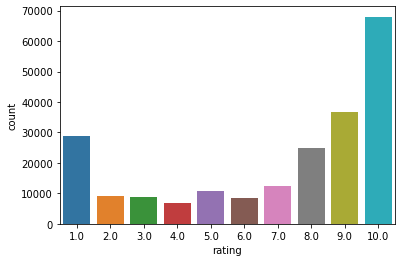

In [6]:
sns.countplot(x='rating',data=train)


In [ ]:
sns.countplot(x='review',hue='rating',data=train)


In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='rating',y='ratingSentimentLabel',data=train,palette='winter')

In [ ]:
def impute_age(cols):
    Id = cols[0]
    rating = cols[1]
    if pd.isnull(Id):
        
        if rating == 1:
            return 37
        elif rating == 2:
            return 29
        else:
            return 24
    else:
        return Id

In [ ]:
train['Id'] = train[['Id','rating']].apply(impute_age,axis=1)


In [ ]:
#sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [ ]:
train.drop('ratingSentiment',axis=1,inplace=True)

In [ ]:
train.info()


In [ ]:
train

In [ ]:
#review = pd.get_dummies(train['review'],drop_first=True)
#cleanReview = pd.get_dummies(train['cleanReview'],drop_first=True)

In [ ]:
train.drop(['Id','review','cleanReview'],axis=1,inplace=True)

In [ ]:
#train = pd.concat([train,sex,embark],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('vaderSentiment',axis=1), train['vaderSentiment'], test_size=0.30, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))